In [0]:
%matplotlib inline


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!pip3 install dicom2nifti
!pip3 install SimpleITK

     |████████████████████████████████| 7.1MB 7.7MB/s 
  Created wheel for dicom2nifti: filename=dicom2nifti-2.1.5-cp36-none-any.whl size=40877 sha256=37f894440efd2e9da6d9473bc81930274f5929c7bb5ca43627bf0dc917345445
  Stored in directory: /root/.cache/pip/wheels/28/58/af/2202276b4d735f781a9a157731404bd88c5ba4ae474398a27b
Successfully built dicom2nifti
     |████████████████████████████████| 42.5MB 1.3MB/s 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import SimpleITK as sitk
from pathlib import Path


In [0]:
t2_train_table = pd.read_pickle('/content/gdrive/My Drive/ProstrateX2-Challenge/ProstateX_temp/ProstateX-master/experimental/src/generated/tables/t2_train.pkl')

In [0]:
t2_significant_findings = t2_train_table[t2_train_table.ClinSig == True]


In [6]:
t2_significant_findings


,ProxID,DCMSerDescr,path_to_resampled_file,fid,pos,ijk,zone,ClinSig
0,ProstateX-0203,t2_tse_tra,/content/gdrive/My Drive/ProstrateX2-Challenge...,1,"(-10.02681, -18.5905, -75.1691)","(144, 132, 11)",AS,True
1,ProstateX-0203,t2_tse_tra,/content/gdrive/My Drive/ProstrateX2-Challenge...,2,"(10.0280456542969, -4.62264251708984, -90.3759...","(180, 162, 8)",PZ,True
3,ProstateX-0202,t2_tse_tra,/content/gdrive/My Drive/ProstrateX2-Challenge...,1,"(-0.02085, -44.5506, 16.7349)","(167, 148, 10)",AS,True
4,ProstateX-0201,t2_tse_tra,/content/gdrive/My Drive/ProstrateX2-Challenge...,1,"(10.1826, -10.0427, 20.9151)","(191, 163, 16)",AS,True
5,ProstateX-0200,t2_tse_tra,/content/gdrive/My Drive/ProstrateX2-Challenge...,1,"(21.8727, -28.9887, -64.2121)","(193, 172, 10)",AS,True
6,ProstateX-0200,t2_tse_tra,/content/gdrive/My Drive/ProstrateX2-Challenge...,1,"(21.8727, -28.9887, -64.2121)","(193, 172, 10)",AS,True
9,ProstateX-0198,t2_tse_tra,/content/gdrive/My Drive/ProstrateX2-Challenge...,1,"(-5.12248, 6.53627, -108.337)","(186, 153, 7)",AS,True
10,ProstateX-0196,t2_tse_tra,/content/gdrive/My Drive/ProstrateX2-Challenge...,3,"(7.7081, 18.6187, -7.06518)","(163, 169, 6)",PZ,True
11,ProstateX-0196,t2_tse_tra,/content/gdrive/My Drive/ProstrateX2-Challenge...,1,"(12.1189, 32.1358, -5.88878)","(172, 196, 7)",PZ,True
12,ProstateX-0196,t2_tse_tra,/content/gdrive/My Drive/ProstrateX2-Challenge...,2,"(35.2755, 27.3587, -8.26241)","(218, 187, 6)",PZ,True


In [0]:
first_sig_case = t2_significant_findings.iloc[0]


In [0]:
first_sig_case_image = sitk.ReadImage(str(first_sig_case['path_to_resampled_file']))


In [0]:
first_sig_case_array = sitk.GetArrayViewFromImage(first_sig_case_image)


In [0]:
pos = first_sig_case['pos']


In [0]:
first_sig_case_cancer_loc = first_sig_case_image.TransformPhysicalPointToIndex(pos)


In [12]:
print("Physical space: ", pos) #(-14.51, 49.44, 20.78)


Physical space:  (-10.02681, -18.5905, -75.1691)


In [13]:
print("Voxel: ", first_sig_case_cancer_loc) #(205, 150, 9)


Voxel:  (162, 211, 11)


In [14]:
print(first_sig_case_array.shape)


(19, 360, 360)


In [15]:

print(first_sig_case_array.ndim)


3


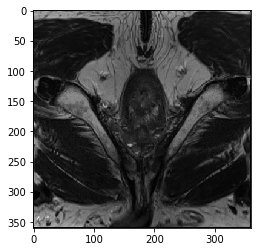

In [16]:

plt.imshow(first_sig_case_array[2,:,:], cmap = 'gray')


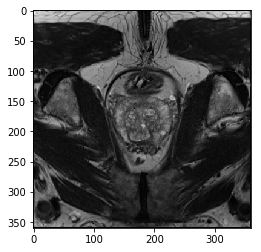

In [17]:
plt.imshow(first_sig_case_array[9,:,:], cmap = 'gray')

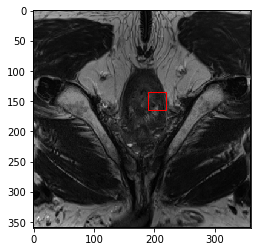

In [18]:
fig,ax = plt.subplots(1)
ax.imshow(first_sig_case_array[2,:,:], cmap = 'gray')
rect = patches.Rectangle((205-15,150-15),30,30,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()


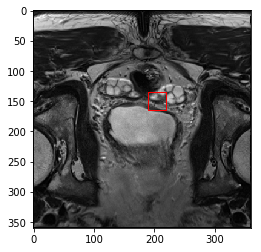

In [19]:
fig,ax = plt.subplots(1)
ax.imshow(first_sig_case_array[18,:,:], cmap = 'gray')
rect = patches.Rectangle((205-15,150-15),30,30,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()
